# 12 Sept 23 - Notes: Dynamical Systems and Phase Space

Dynamical systems is a branch of mathematics that seeks to investigate the time dependence of a system and characterize the families of trajectories that the system can have. We don't often solve the system for a given set of initial conditions in dynamical systems work. Instead, we want to **uncover the families of possible solutions** for a system to see what kinds of things it *can* do. An excellent book on this subject that we will draw from is Strogatz's book on Nonlinear Dynamics {cite}`strogatz2018nonlinear`; I highly recommend you find a copy for yourself.

## Geometric Thinking and Phase Portraits

One of the first things we will use to investigate systems from a dynamical systems perspective is the [phase portrait](https://en.wikipedia.org/wiki/Phase_portrait), where we will plot the velocity against the position. We can use the phase portrait to tell us what families of solutions we might expect to see. 

*Phase portraits are quite useful for second order differential equations (or any two-dimensional system) because we frequently use and interpret 2D graphs.* Notice that we focused on "2nd order differential equations" not "linear 2nd order." That is because, as we will see, **phase portraits are particularly useful for nonlinear 2nd order differential equations.**

## Lecture Video

We will go into the details of how to construct and develop phase portraits in class. This video from [Steve Brunton](https://www.me.washington.edu/facultyfinder/steve-brunton) is a good overview of the process. It's quite detailed and takes a mathematical perspective, so don't worry if you don't understand everything in the video. We have plenty of time to investigate how this works in practice.

[![](https://markdown-videos-api.jorgenkh.no/youtube/vBwyD4JJlSs?width=720&height=405)](https://inv.tux.pizza/watch?v=vBwyD4JJlSs)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=vBwyD4JJlSs](https://inv.tux.pizza/watch?v=vBwyD4JJlSs)
- Commercial Link: [https://youtube.com/watch?v=vBwyD4JJlSs](https://youtube.com/watch?v=vBwyD4JJlSs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Phase Portrait of the SHO

To get this started, let's develop the phase portrait of the SHO. Recall that we separated the second order ODE into two first order ODEs, one for $x$ and one for $v_x$,

$$\dot{x} = v_x$$
$$\dot{v}_x=-\omega^2x$$

We then map out the phase space with the following conceptual interpretation:

- Phase space is a space in which all possible states of the system can be shown
    - a state is a collection of conditions of the state (it's known position and velocity in our case)
- Each state is a unique point in phase space
    - Think about ordered Cartesian pairs, there's a pair of numbers for every point in a 2D space
- Remember that knowing $x_0$ and $v_{x,0}$ means we can know $x(t)$ for all time (for that one trajectory/particular solution) given a linear ODE

We map the differential equation to the following conceptual interpretation: **How the state changes depends on location in phase space.** We can understand this as the time derivative for $x$ and $v_x$ change throughout the space.

For our 2D SHO case we are saying that how $x$ and $v_x$ change is proportional to the position in space:

$$\langle \dot{x}, \dot{v}_x \rangle = \langle v_x, -\omega^2 x\rangle$$

The process is:

1. Determine the location(s) of interest (i.e., $x$, $v_x$)
2. Compute the change in those quantities at the location (i.e., calculate $\dot{x}$ and $\dot{v}_x$ using our prescribed 1st order ODEs above)
3. At a given point ($x_0$, $v_{x,0}$), create an arrow the indicates the direction and magnitude of the changes to $x$ and $v_x$ at that location.
    - That arrow represents the local flow of the system at that point
4. Repeat for all points of interest
5. Plot arrows to demonstrate flow of the solutions in phase space

### Let's focus on axes first

We talked about how we can look at the axes ($x=0$ and $v_x =0$) to help get a sense of the flow in phase space. Below, we have some code that does this in two parts:
1. We created a function to produce arrows of the right length given a line of points
2. We call that function for each axis and for a line at a diagonal

### Questions to consider.

1. Review the phase portraits below. How are they constructed?
    - Work to identify which components of the code look familiar and which you have more questions about
2. Try to make a fourth plot that looks at the other diagonal line that runs at a 45 degree angle to each axes

**You should be able to explain what the code is doing.** We avoided using Numpy's [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) here to make this a smaller bit of code.

### PlotPhaseSpaceAxesSHO

This function is computing the arrows for a given line of points in phase space. Send it a line of points in two arrays (one for $x$ and one for $v_x$) and it plots the resulting arrows. The code is documented below with comments and then used several times.

In [2]:
def PlotPhaseSpaceAxesSHO(x, vx, N=20):
    """Takes two one-dimensional arrays
    and computes the resulting arrow to
    represent the flow of the system in 
    phase space. This code is specifically
    designed for the SHO with omega=1"""

    ## Map the points to the arrows using the 
    ## 1st order ODEs for the SHO
    ## Returns two arrays of the same length
    ## as the inputs
    xdot, vxdot = vx, -1*x

    ## Create a figure with a known size
    plt.figure(figsize=(10,8))

    ## Go through all the arrays we created to plot the arrows
    ## Syntax for arrow is:
    ## arrow(xpos, ypos, xchange, ychange, other_parameters)
    for i in np.arange(N):
    
        plt.arrow(x[i], vx[i], xdot[i], vxdot[i], 
                  head_width=0.2, 
                  head_length=0.2)
        plt.xlabel('$x$')
        plt.ylabel('$v_x$')
        
    plt.grid()

### Plotting along the vx axis


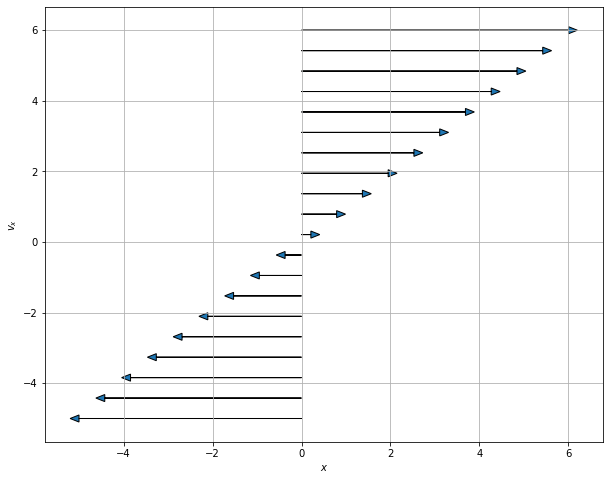

In [3]:
## Plotting along the vx axis
N = 20

x = np.zeros(N)
vx = np.linspace(-5,6,N)

PlotPhaseSpaceAxesSHO(x, vx, N)

### Plotting along the x axis


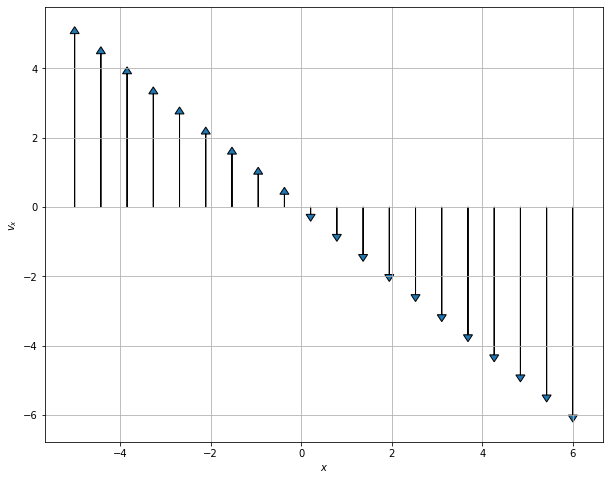

In [4]:
## Plotting along the x axis
N = 20

x = np.linspace(-5,6,N)
vx = np.zeros(N)

PlotPhaseSpaceAxesSHO(x, vx, N)

### Plotting along the 45 degree line between the x and vx axes

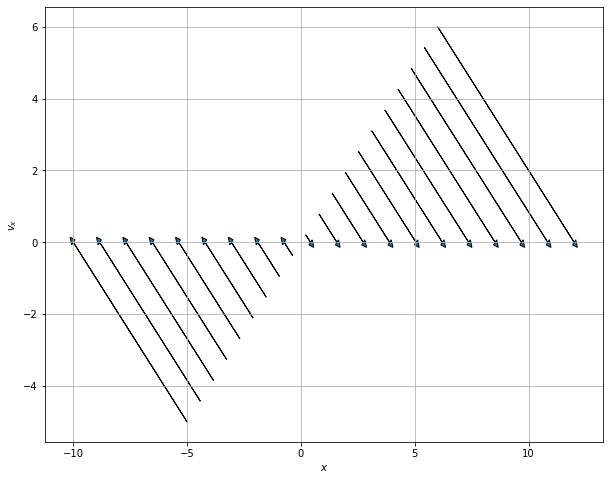

In [5]:
## Plotting along the 45 degree line between the x and vx axes
N = 20

x = np.linspace(-5,6,N)
vx = np.linspace(-5,6,N)

PlotPhaseSpaceAxesSHO(x, vx, N)

### Make a Graph

**&#9989; Do this** 

1. Make a fourth plot that looks at the other diagonal line that runs at a 45 degree angle to each axes

In [6]:
## Your code here
## Plot the other 45 degree line

## Phase Portrait of the Simple Harmonic Oscillator

Below, we have written code that makes a phase portrait from the simple harmonic oscillator. It's written in terms of three functions that serve three purposes that you might want to modify in your own work:

* ``SHOPhasePortrait`` is a function that simply returns the relationship between the locations in phase space and how the phase variables change at that location. 
* ``ComputeSHOPhase`` is a function that uses that relationship and computes the values of the changes at every location. It returns two arrays, which contain all those values.
* ``SHOTrajectory`` is a function that takes a pair of points in space and computes the trajectory in phase space

By separating these ideas, we are illustrating the process for computing these phase portraits:
- Translate the $N$th order differential equation to $N$ 1st order (Done earlier in this case)
- Put that into a code so you can compute the value of the changes at a location (``SHOPhasePotrait``)
- Call that computation a bunch to compute it at every location you want (``ComputeSHOPhase``)
- investigate specific trajectories in the space (``SHOTrajectory``)

We can then call these functions can plots the results.

In [7]:
def SHOPhasePortrait(x, vx, omega):
    '''SHOPhasePortrait returns the value of
    the change in the phase variables at a given location
    in phase space for the SHO model'''
    
    xdot, vxdot = [vx, -1*omega**2*x] ## Specific to this problem
    
    return xdot, vxdot

In [8]:
def ComputeSHOPhase(X, VX, omega):
    '''ComputeSHOPhase returns the changes in 
    the phase variables across a grid of locations
    that are specified'''
    
    ## Prep the arrays with zeros at the right size
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)

    ## Set the limits of the loop based on how 
    ## many points in the arrays we have
    Xlim, Ylim = X.shape
    
    ## Calculate the changes at each location and add them to the arrays
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = SHOPhasePortrait(xloc, yloc, omega)
            
    return xdot, vxdot

In [9]:
def SHOTrajectory(x0, vx0, omega, N=100):
    '''SHOTrajectory computes the phase space
    trjectory using the analytical forms of the
    solution. Note this sloppy analytical approach
    only works because the SHO is perfectly sinusoidal.'''
    
    ## Only work with one period
    T = 2*np.pi/omega
    t = np.arange(0,T,T/N)
    
    ## I derived this in general with Acos(wt+phi)
    ## It's not in general a good approach
    ## because you are not guaranteed analytical 
    ## closed form trajectories in phase space
    
    phi = np.arctan2(-1*vx0, omega*x0) ## arctan(-vxo/(omega*x0)) taken correctly for the quadrant
    A = x0/np.cos(phi)
    x_traj = A*np.cos(omega*t+phi)
    v_traj = -omega*A*np.sin(omega*t+phi)
    
    return x_traj, v_traj

### Putting the functions to use

With these two functions, all we are left to do is specify the size of the space and the grid points (that is where exactly we are computing the changes). We use [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to make those arrays a set of Cartesian coordinates and then send that to our functions.

We then plots the results.

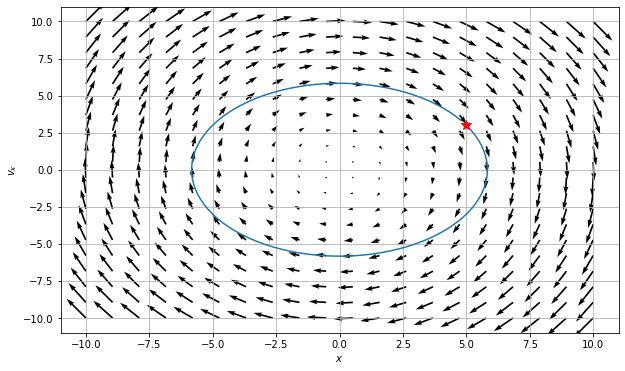

In [10]:
## Setting parameters and the phase space variables

omega = 1
x = np.linspace(-10.0, 10.0, 20)
vx = np.linspace(-10.0, 10.0, 20)

## Get back pairs of coordinates for every point in the space
X, VX = np.meshgrid(x, vx)

## Run our calculations
xdot, vxdot = ComputeSHOPhase(X, VX, omega)

x0 = 5
vx0 = 3
x_traj, v_traj = SHOTrajectory(x0, vx0, omega)

## Plot. plot. plot.
ax = plt.figure(figsize=(10,6))
Q = plt.quiver(X, VX, xdot, vxdot, color='k')

## Plot trajectory and the starting location
plt.plot(x_traj,v_traj)
plt.plot(x0, vx0, 'r*', markersize=10)

plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.grid()

### What can phase space help us do? 


Let's remember a few things about the SHO. 

1. List all the things you know about the SHO. Include anything we haven't discussed (e.g., the energetics of the problem).
2. Name which of those things you can see in the phase diagram. Which things are you sure you can see? What things don't seem to be able to be seen from the phase diagram? 
3. What do you remember about the energy of an SHO? Consider a harmonic oscillator in a known trajectory ($x(t) = A\cos(\omega t)$). Compute the total (conserved) energy of the oscillator as a function of time. 
    - Explain how your expression for energy conservation can be seen in your phase diagram. 
    - You might try to show analytically that the ellipse above is related to your energy conservation expression

What does this plots tell you about all potential solutions?

## Handwritten Notes

Below, I have worked up some additional notes that describe the conceptual and procedural aspects of phase space with respect to the SHO.

* [Phase Space and the SHO](../../assets/notes/Notes-Phase_Space.pdf)